In [2]:
import h5py
import numpy as np
import pandas as pd
from collections import defaultdict
import h5py
import os
import sys
import h5py
from importlib import reload
import src.MSDS_conversion as msds
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_id = os.environ['SPOTIFY_CLIENT_ID']
client_secret = os.environ['SPOTIFY_CLIENT_SECRET']
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

The following examples come from https://spotipy.readthedocs.io/en/latest/

In [22]:
#Here’s a quick example of using Spotipy to list the names of all the albums released by the artist ‘Birdy’:

birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'

results = sp.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live In London
Birdy
Birdy
Birdy (Spotify Exclusive)
Birdy
Birdy (Deluxe Version)


In [23]:
#Here’s another example showing how to get 30 second samples and cover art for the top 10 tracks for Led Zeppelin:

lz_uri = 'spotify:artist:36QJpDe2go2KgaRleHCDTp'

results = sp.artist_top_tracks(lz_uri)

for track in results['tracks'][:10]:
    print ('track    : ' + track['name'])
    print ('audio    : ' + track['preview_url'])
    print ('cover art: ' + track['album']['images'][0]['url'])
    print ()

track    : Stairway to Heaven - Remaster
audio    : https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=5157426229ce47aea8e1a6c56e231ddf
cover art: https://i.scdn.co/image/557a6058e3de72bf37ffcd2c12dd5932276df344

track    : Immigrant Song - Remaster
audio    : https://p.scdn.co/mp3-preview/8455599677a13017978dcd3f4b210937f0a16bcb?cid=5157426229ce47aea8e1a6c56e231ddf
cover art: https://i.scdn.co/image/e6e513e68c4eefdfc7bc213b35061c9c30b42dfa

track    : Whole Lotta Love - 1990 Remaster
audio    : https://p.scdn.co/mp3-preview/ce11b19a4d2de9976d7626df0717d0073863909c?cid=5157426229ce47aea8e1a6c56e231ddf
cover art: https://i.scdn.co/image/5fa3a6cc1848ea743a293d2088046746d1b09608

track    : Black Dog - Remaster
audio    : https://p.scdn.co/mp3-preview/9b76619fd9d563a48d38cc90ca00c3008327b52e?cid=5157426229ce47aea8e1a6c56e231ddf
cover art: https://i.scdn.co/image/557a6058e3de72bf37ffcd2c12dd5932276df344

track    : Good Times Bad Times - 1993 Remaster
audio    : htt

In [35]:
stairway_to_heaven_audio = requests.get('https://p.scdn.co/mp3-preview/8226164717312bc411f8635580562d67e191a754?cid=5157426229ce47aea8e1a6c56e231ddf')
stairway_to_heaven_art = requests.get('https://i.scdn.co/image/557a6058e3de72bf37ffcd2c12dd5932276df344')

In [30]:
client_id = os.environ['SPOTIFY_CLIENT_ID']
client_secret = os.environ['SPOTIFY_CLIENT_SECRET']
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [38]:
### THIS WORKS ###


import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlists = sp.user_playlists('jeff')

while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:7n0MoJT91mBv9dafQAlYMM Have Yourself A Merry Little Christmas – Sam Smith
   2 spotify:playlist:6cdo5E84vzyxE3WpIb7RcF Carros flyg spellista 
   3 spotify:playlist:37i9dQZEVXbLoATJ81JYXz Sweden Top 50
   4 spotify:playlist:3QWmU2TQXJ7QgBx9qCw2Me Soft
   5 spotify:playlist:61JoVU0gltK7hKWlKz4zph My Shazam Tracks
   6 spotify:playlist:5NtPlB10QMucn5qa8eKQtF tjejmiddag 2016
   7 spotify:playlist:30MHritF57BPbtK6NQvSWo bil/tåg/buss/ tunnelbana/flygplan
   8 spotify:playlist:37i9dQZF1DWVYZVgDjIR7c Soft vår
   9 spotify:playlist:37i9dQZF1DXci7j0DJQgGp Hanging Out and Relaxing
  10 spotify:playlist:37i9dQZF1DWXRvPx3nttRN Feeling Acoustically Good
  11 spotify:playlist:3fSB0lu9fV5jspidl73IyI sb
  12 spotify:playlist:04yxRd4FJEtaxS2VYiY7Kd George Harrison – Somewhere In England
  13 spotify:playlist:37i9dQZF1DX4E3UdUs7fUx Afternoon Acoustic
  14 spotify:playlist:777p4DfxP56ojiSkr8JteW Tjejdisco oktober 2015
  15 spotify:playlist:6q02mDtpupMTZNKOYIAOJU Svenskt
  16 spotify:

In [39]:
birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'

results = sp.artist_albums(birdy_uri, album_type='album')
albums = results['items']
while results['next']:
    results = sp.next(results)
    albums.extend(results['items'])

for album in albums:
    print(album['name'])

Beautiful Lies
Beautiful Lies
Beautiful Lies (Deluxe)
Beautiful Lies (Deluxe)
Fire Within
Fire Within
Fire Within (Deluxe)
Fire Within (Deluxe)
Fire Within (Deluxe)
Live In London
Birdy
Birdy
Birdy (Spotify Exclusive)
Birdy
Birdy (Deluxe Version)


In [44]:
import sys

if len(sys.argv) > 1:
    name = ' '.join(sys.argv[1:])
else:
    name = 'Radiohead'

name = 'Lady Gaga'
results = sp.search(q='artist:' + name, type='artist')
items = results['artists']['items']
if len(items) > 0:
    artist = items[0]
    print (artist['name'], artist['images'][0]['url'])

Lady Gaga https://i.scdn.co/image/ea76c82c05174105751f850c8a1db426dd03aa78


In [62]:
results = sp.search(q='bohemian rhapsody', type='track')
bohemian_rhapsody_id = results['tracks']['items'][0]['id']
br_analysis = sp.audio_analysis(bohemian_rhapsody_id)
br_features = sp.audio_features(bohemian_rhapsody_id)

In [63]:
br_features

[{'danceability': 0.397,
  'energy': 0.396,
  'key': 3,
  'loudness': -9.91,
  'mode': 1,
  'speechiness': 0.05,
  'acousticness': 0.254,
  'instrumentalness': 0,
  'liveness': 0.268,
  'valence': 0.227,
  'tempo': 142.913,
  'type': 'audio_features',
  'id': '7tFiyTwD0nx5a1eklYtX2J',
  'uri': 'spotify:track:7tFiyTwD0nx5a1eklYtX2J',
  'track_href': 'https://api.spotify.com/v1/tracks/7tFiyTwD0nx5a1eklYtX2J',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7tFiyTwD0nx5a1eklYtX2J',
  'duration_ms': 354320,
  'time_signature': 4}]

In [70]:
br_analysis.keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'tatums', 'sections', 'segments'])

In [69]:
br_analysis['meta']

{'analyzer_version': '4.0.0',
 'platform': 'Linux',
 'detailed_status': 'OK',
 'status_code': 0,
 'timestamp': 1478078115,
 'analysis_time': 11.00165,
 'input_process': 'libvorbisfile L+R 44100->22050'}

In [79]:
len(br_analysis['segments'])

1103

In [80]:
import src.MSDS_conversion as msds

In [83]:
br_bars = []
for bar in br_analysis['bars']:
    br_bars.append(bar['start'])

br_beats = []
for beat in br_analysis['beats']:
    br_beats.append(beat['start'])

br_tatums = []
for tatum in br_analysis['tatums']:
    br_tatums.append(tatum['start'])

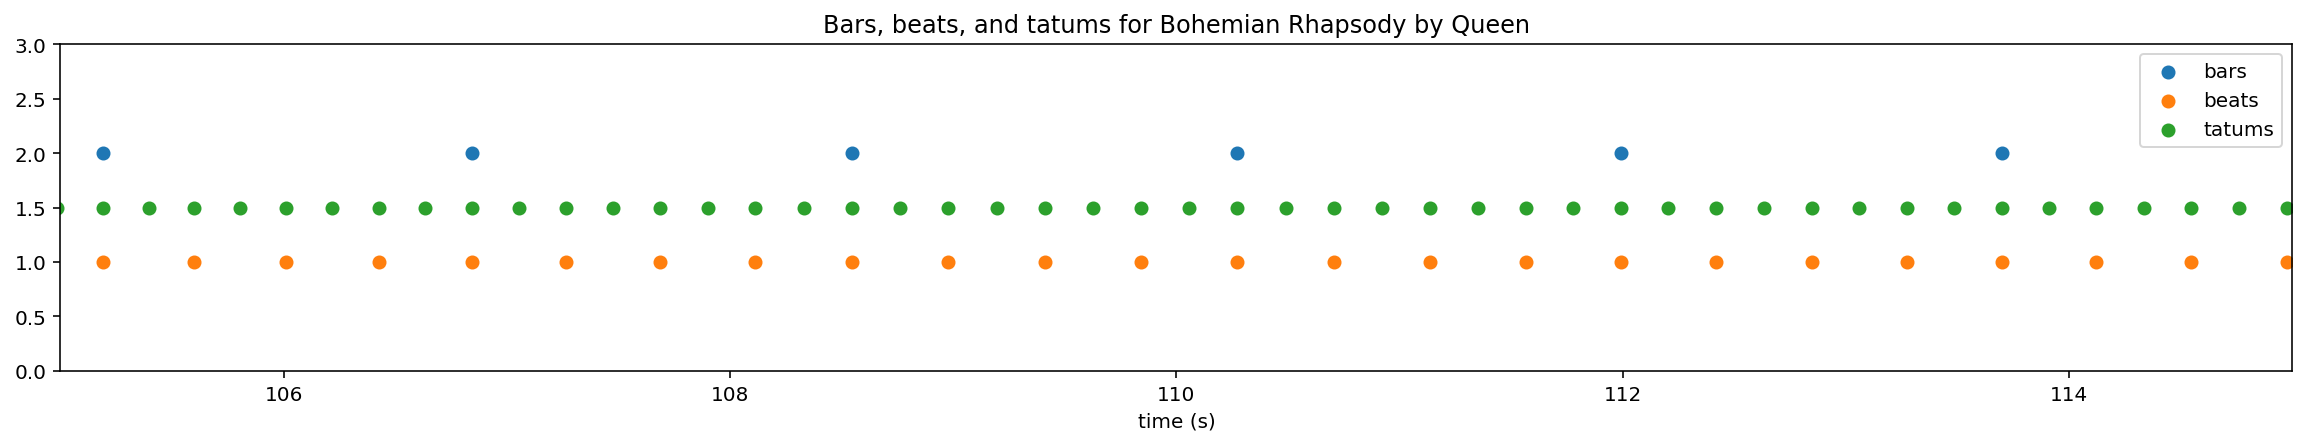

In [99]:
plt.figure(figsize = (20,3))
plt.scatter(x = br_bars, y = 2*np.ones(len(br_bars)), label = 'bars')
plt.scatter(x = br_beats, y = 1*np.ones(len(br_beats)), label = 'beats')
plt.scatter(x = br_tatums, y = 1.5*np.ones(len(br_tatums)), label = 'tatums')
plt.xlim((105,115))
plt.ylim((0,3))
plt.legend()
plt.xlabel('time (s)')
plt.title('Bars, beats, and tatums for Bohemian Rhapsody by Queen')
plt.show()

Text(0.5, 1.0, 'distance between successive beats in Bohemian Rhapsody by Queen')

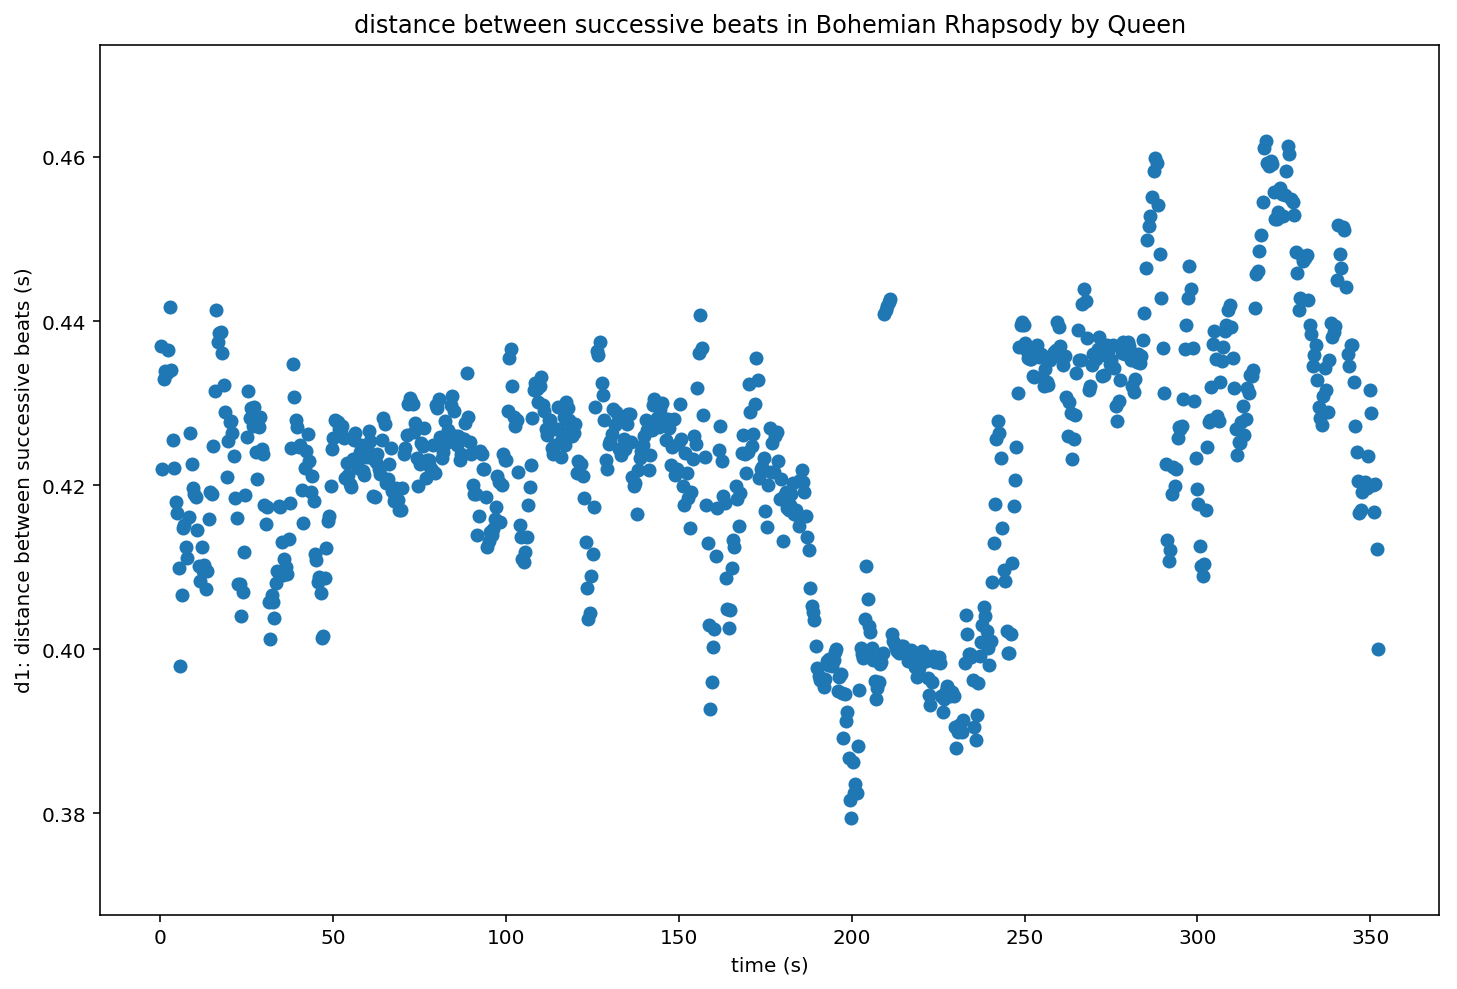

In [104]:
br_beat_diff = np.array(br_beats[1:]) - np.array(br_beats[:-1])

plt.figure(figsize=(12,8))
plt.scatter(x = br_beats[:-1], y = br_beat_diff)
plt.xlabel('time (s)')
plt.ylabel('d1: distance between successive beats (s)')
plt.title('distance between successive beats in Bohemian Rhapsody by Queen')

Using successive beats, we can see the three sections of the song fairly clearly, and if I were better at matplotlib I would annotate them prettily.

# Plotting Timbre as a function of time

In [120]:
br_analysis['segments'][0]

{'start': 0.0,
 'duration': 0.19084,
 'confidence': 0.0,
 'loudness_start': -60.0,
 'loudness_max_time': 0.13579,
 'loudness_max': -59.524,
 'pitches': [0.343,
  0.319,
  1.0,
  0.594,
  0.222,
  0.353,
  0.452,
  0.145,
  0.178,
  0.108,
  0.134,
  0.493],
 'timbre': [0.268,
  165.311,
  1.973,
  -32.848,
  53.035,
  -49.393,
  16.332,
  3.761,
  -27.417,
  2.703,
  -11.108,
  -5.63]}

In [121]:
br_timbres = []
br_segment_times = []
br_pitches = []
for segment in br_analysis['segments']:
    br_timbres.append(segment['timbre'])
    br_segment_times.append(segment['start'])
    br_pitches.append(segment['pitches'])
    
br_timbres = np.stack(br_timbres)
br_pitches = np.stack(br_pitches)
br_segment_times = np.array(br_segment_times)
br_segment_times

array([0.0000000e+00, 1.9084000e-01, 3.7741000e-01, ..., 3.4799719e+02,
       3.4814839e+02, 3.5286798e+02])

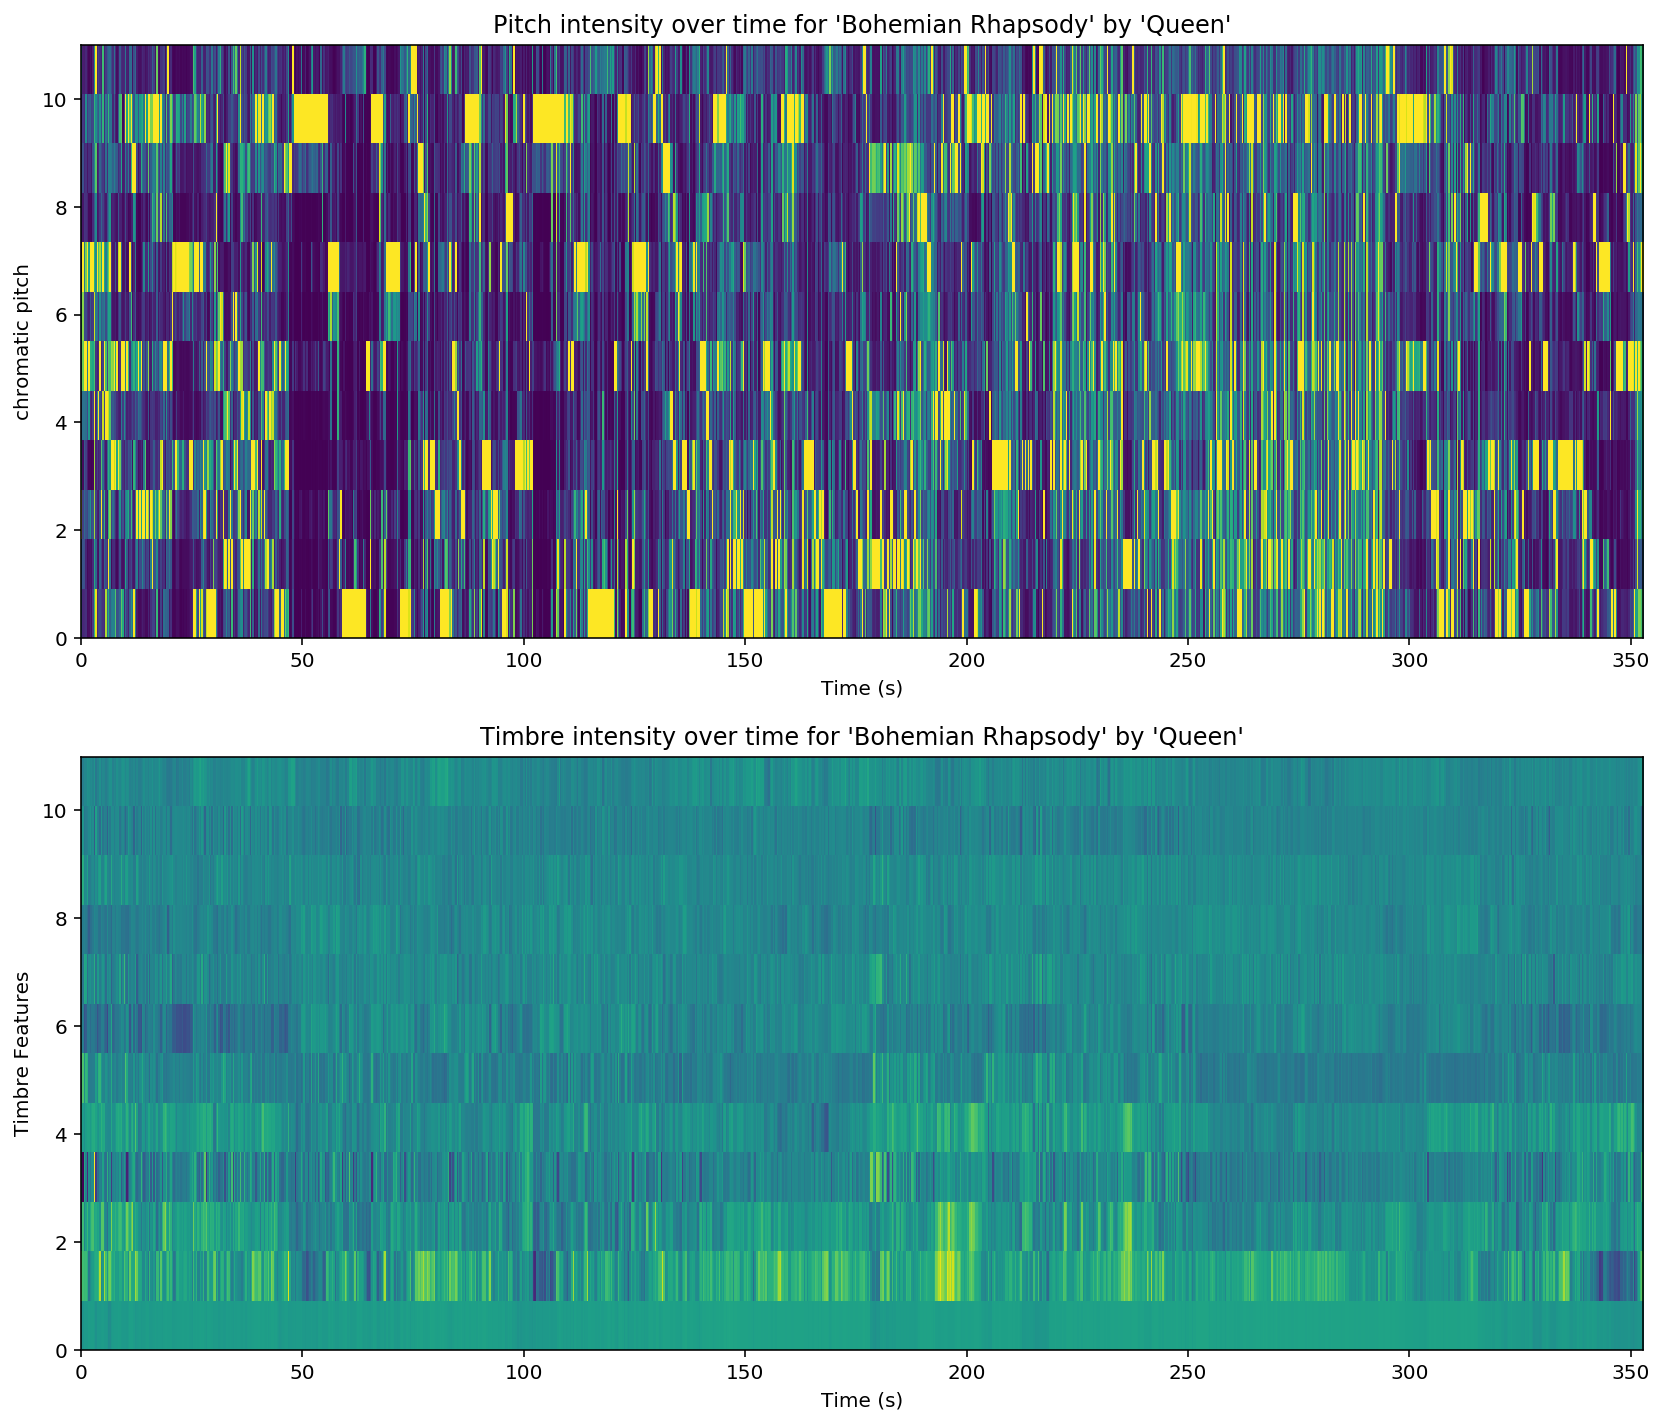

In [130]:
song_name = "Bohemian Rhapsody"
artist_name = "Queen"

fig, axs = plt.subplots(2, figsize=(14, 12))

axs[0].imshow(br_pitches.T, aspect='auto', origin = 'lower', extent = [br_segment_times[0],br_segment_times[-1],0,11])
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('chromatic pitch')
# axs[0].colorbar()
axs[0].set_title("Pitch intensity over time for '{}' by '{}'".format(song_name, artist_name))

axs[1].imshow(br_timbres.T, aspect='auto', origin = 'lower', extent = [br_segment_times[0],br_segment_times[-1],0,11])
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Timbre Features')
# axs[1].colorbar()
axs[1].set_title("Timbre intensity over time for '{}' by '{}'".format(song_name, artist_name))

fig.show()

In [11]:
sp.search(q='this+side',type='track')

{'tracks': {'href': 'https://api.spotify.com/v1/search?query=this%2Bside&type=track&offset=0&limit=10',
  'items': [{'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3LjhVl7GzYsza1biQjTpaN'},
       'href': 'https://api.spotify.com/v1/artists/3LjhVl7GzYsza1biQjTpaN',
       'id': '3LjhVl7GzYsza1biQjTpaN',
       'name': 'Hayley Kiyoko',
       'type': 'artist',
       'uri': 'spotify:artist:3LjhVl7GzYsza1biQjTpaN'}],
     'available_markets': ['AD',
      'AE',
      'AR',
      'AT',
      'AU',
      'BE',
      'BG',
      'BH',
      'BO',
      'BR',
      'CA',
      'CH',
      'CL',
      'CO',
      'CR',
      'CY',
      'CZ',
      'DE',
      'DK',
      'DO',
      'DZ',
      'EC',
      'EE',
      'EG',
      'ES',
      'FI',
      'FR',
      'GB',
      'GR',
      'GT',
      'HK',
      'HN',
      'HU',
      'ID',
      'IE',
      'IL',
      'IN',
      'IS',
      'IT',
      'JO',
      'JP',
 